# Benchmark Results

Plotting benchmark results to see the factor that effect each solvers.

In [2]:
# Import Object from result.json
import json

with open('result.json') as f:
    data = json.load(f)

print(data[:3])

[{'nodes': 4, 'max_edge_weight': 9, 'avg_edge_weight': 3.0, 'distance_matrix': [[0, 9, 2, 1], [9, 0, 8, 5], [2, 8, 0, 3], [1, 5, 3, 0]], 'interaction_matrix': [[0, 2, 4, 7], [2, 0, 3, 3], [4, 3, 0, 1], [7, 3, 1, 0]], 'qp_weight': 1000000, 'time_model_formulation': 0.0009207725524902344, 'gurobi_objective': 144.0, 'gurobi_execution_time': 0.01624, 'fixstars_objective': 144.0, 'fixstars_execution_time': 0.945409, 'dwave_objective': 144.0, 'dwave_execution_time': 0.190519}, {'nodes': 4, 'max_edge_weight': 9, 'avg_edge_weight': 4.5, 'distance_matrix': [[0, 4, 9, 7], [4, 0, 3, 9], [9, 3, 0, 4], [7, 9, 4, 0]], 'interaction_matrix': [[0, 4, 9, 8], [4, 0, 2, 9], [9, 2, 0, 4], [8, 9, 4, 0]], 'qp_weight': 1000000, 'time_model_formulation': 0.0005192756652832031, 'gurobi_objective': 364.0, 'gurobi_execution_time': 0.007966, 'fixstars_objective': 364.0, 'fixstars_execution_time': 0.985476, 'dwave_objective': 364.0, 'dwave_execution_time': 0.190519}, {'nodes': 4, 'max_edge_weight': 9, 'avg_edge_wei

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

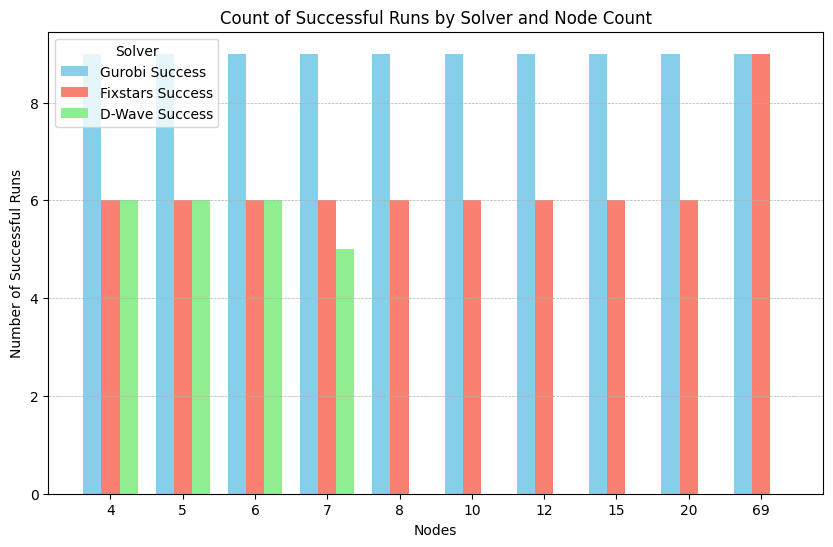

In [4]:
# Convert data to a pandas DataFrame
df = pd.DataFrame(data)

# Check for non-null objectives and execution times
success_conditions = (
    (df["gurobi_objective"].notnull()) & (df["gurobi_execution_time"].notnull()),
    (df["fixstars_objective"].notnull()) & (df["fixstars_execution_time"].notnull()),
    (df["dwave_objective"].notnull()) & (df["dwave_execution_time"].notnull())
)

# Count successes for each solver by nodes
success_counts = {
    "nodes": df["nodes"].unique(),
    "gurobi_success": [((df["nodes"] == node) & success_conditions[0]).sum() for node in df["nodes"].unique()],
    "fixstars_success": [((df["nodes"] == node) & success_conditions[1]).sum() for node in df["nodes"].unique()],
    "dwave_success": [((df["nodes"] == node) & success_conditions[2]).sum() for node in df["nodes"].unique()],
}

# Convert success_counts to DataFrame for plotting
success_df = pd.DataFrame(success_counts)

# Plotting
bar_width = 0.25
index = np.arange(len(success_df["nodes"]))

plt.figure(figsize=(10, 6))
plt.bar(index, success_df["gurobi_success"], bar_width, label="Gurobi Success", color="skyblue")
plt.bar(index + bar_width, success_df["fixstars_success"], bar_width, label="Fixstars Success", color="salmon")
plt.bar(index + 2 * bar_width, success_df["dwave_success"], bar_width, label="D-Wave Success", color="lightgreen")

# Adding labels and title
plt.xlabel("Nodes")
plt.ylabel("Number of Successful Runs")
plt.title("Count of Successful Runs by Solver and Node Count")
plt.xticks(index + bar_width, success_df["nodes"])
plt.legend(title="Solver")

plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

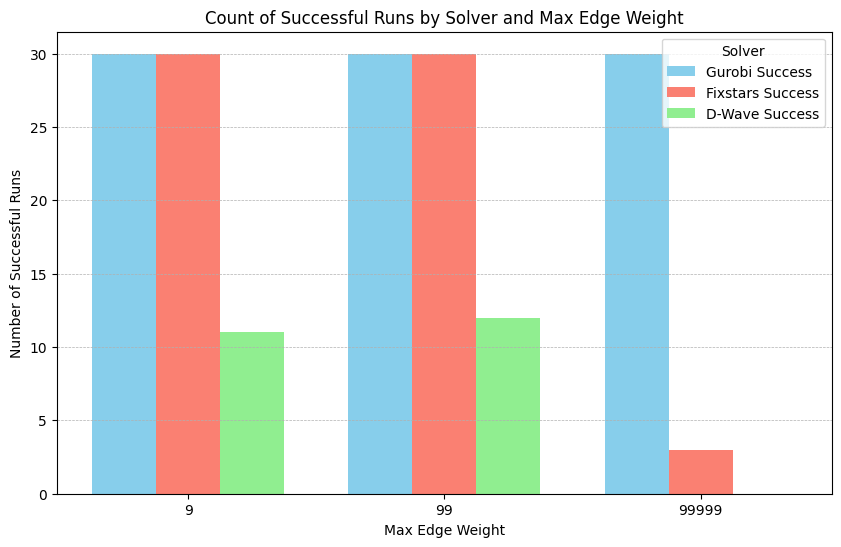

In [5]:
# Count successes for each solver by max edge weight
success_counts = {
    "max_edge_weight": df["max_edge_weight"].unique(),
    "gurobi_success": [((df["max_edge_weight"] == weight) & success_conditions[0]).sum() for weight in df["max_edge_weight"].unique()],
    "fixstars_success": [((df["max_edge_weight"] == weight) & success_conditions[1]).sum() for weight  in df["max_edge_weight"].unique()],
    "dwave_success": [((df["max_edge_weight"] == weight) & success_conditions[2]).sum() for weight in df["max_edge_weight"].unique()],
}

# Convert success_counts to DataFrame for plotting
success_df = pd.DataFrame(success_counts)

# Plotting
bar_width = 0.25
index = np.arange(len(success_df["max_edge_weight"]))

plt.figure(figsize=(10, 6))
plt.bar(index, success_df["gurobi_success"], bar_width, label="Gurobi Success", color="skyblue")
plt.bar(index + bar_width, success_df["fixstars_success"], bar_width, label="Fixstars Success", color="salmon")
plt.bar(index + 2 * bar_width, success_df["dwave_success"], bar_width, label="D-Wave Success", color="lightgreen")

# Adding labels and title
plt.xlabel("Max Edge Weight")
plt.ylabel("Number of Successful Runs")
plt.title("Count of Successful Runs by Solver and Max Edge Weight")
plt.xticks(index + bar_width, success_df["max_edge_weight"])
plt.legend(title="Solver")

plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

In [6]:
# Total Number of failed run
print("Total Run:", len(df))
print("Total Number of failed run for Gurobi:", df["gurobi_objective"].isnull().sum())
print("Total Number of failed run for Fixstars:", df["fixstars_objective"].isnull().sum())
print("Total Number of failed run for D-Wave:", df["dwave_objective"].isnull().sum())

Total Run: 90
Total Number of failed run for Gurobi: 0
Total Number of failed run for Fixstars: 27
Total Number of failed run for D-Wave: 67


## Sparse vs Dense

In [ ]:
df['dense_ratio'] = (df['distance_matrix'].apply(np.count_nonzero) + df['interaction_matrix'].apply(np.count_nonzero)) / (2 * df['nodes'] ** 2 - 2 * df['nodes'])


TypeError: agg function failed [how->mean,dtype->object]

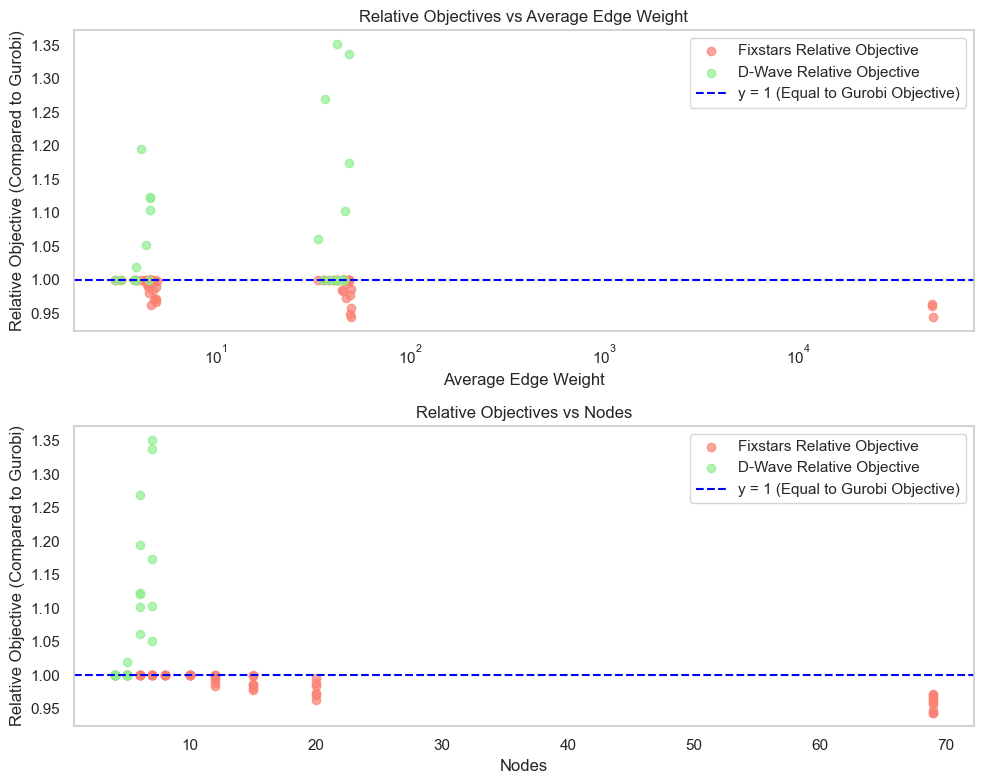

In [6]:
# Convert data to DataFrame
df = pd.DataFrame(data)

# Calculate relative objectives compared to Gurobi objective
df['fixstars_relative'] = df['fixstars_objective'] / df['gurobi_objective']
df['dwave_relative'] = df['dwave_objective'] / df['gurobi_objective']

# Set Seaborn style
sns.set_theme(style='whitegrid')

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot for avg_edge_weight
axes[0].scatter(df['avg_edge_weight'], df['fixstars_relative'], color='salmon', label='Fixstars Relative Objective', alpha=0.7)
axes[0].scatter(df['avg_edge_weight'], df['dwave_relative'], color='lightgreen', label='D-Wave Relative Objective', alpha=0.7)
axes[0].axhline(y=1, color='blue', linestyle='--', label='y = 1 (Equal to Gurobi Objective)')
axes[0].set_xlabel("Average Edge Weight")
axes[0].set_ylabel("Relative Objective (Compared to Gurobi)")
axes[0].set_title("Relative Objectives vs Average Edge Weight")
axes[0].legend()
axes[0].grid()
axes[0].set_xscale("log")

# Plot for nodes
axes[1].scatter(df['nodes'], df['fixstars_relative'], color='salmon', label='Fixstars Relative Objective', alpha=0.7)
axes[1].scatter(df['nodes'], df['dwave_relative'], color='lightgreen', label='D-Wave Relative Objective', alpha=0.7)
axes[1].axhline(y=1, color='blue', linestyle='--', label='y = 1 (Equal to Gurobi Objective)')
axes[1].set_xlabel("Nodes")
axes[1].set_ylabel("Relative Objective (Compared to Gurobi)")
axes[1].set_title("Relative Objectives vs Nodes")
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

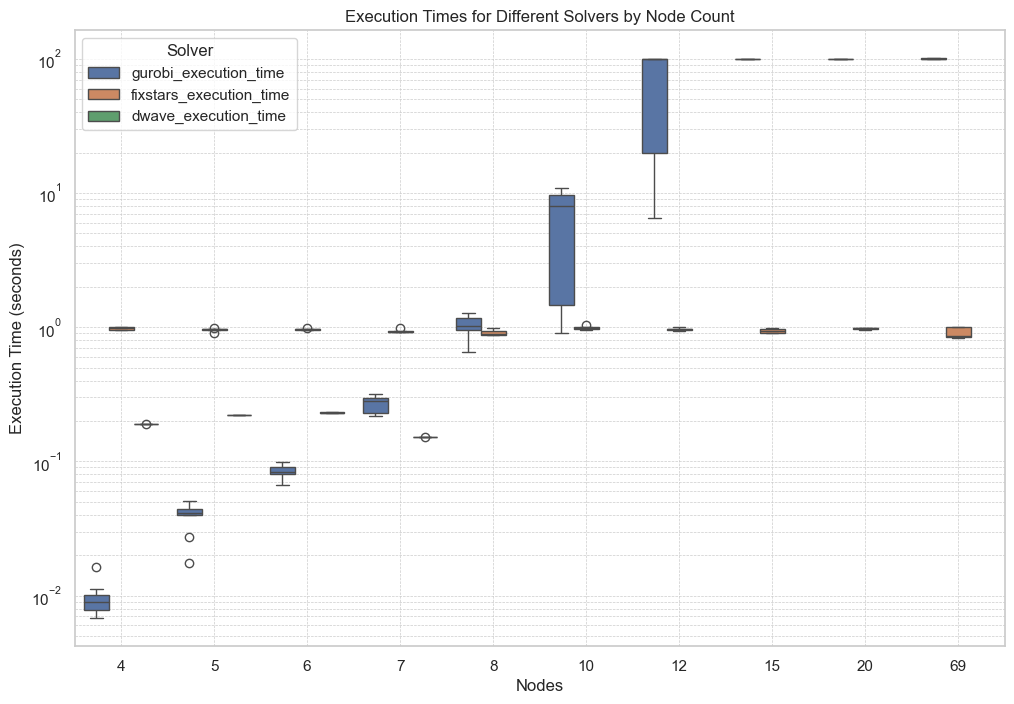

In [7]:
# Plot Box and Whisker plot where nodes are on x-axis and time for each solver in y-axis

# Convert data to a pandas DataFrame for easy plotting
df = pd.DataFrame(data)

# Melt the DataFrame to have a long-form format suitable for Seaborn boxplot
df_melted = df.melt(id_vars=["nodes"], 
                    value_vars=["gurobi_execution_time", "fixstars_execution_time", "dwave_execution_time"], 
                    var_name="solver", 
                    value_name="execution_time")

# Plotting
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_melted, x="nodes", y="execution_time", hue="solver")
plt.yscale("log")

# Adding labels and title
plt.xlabel("Nodes")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Times for Different Solvers by Node Count")
plt.legend(title="Solver")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

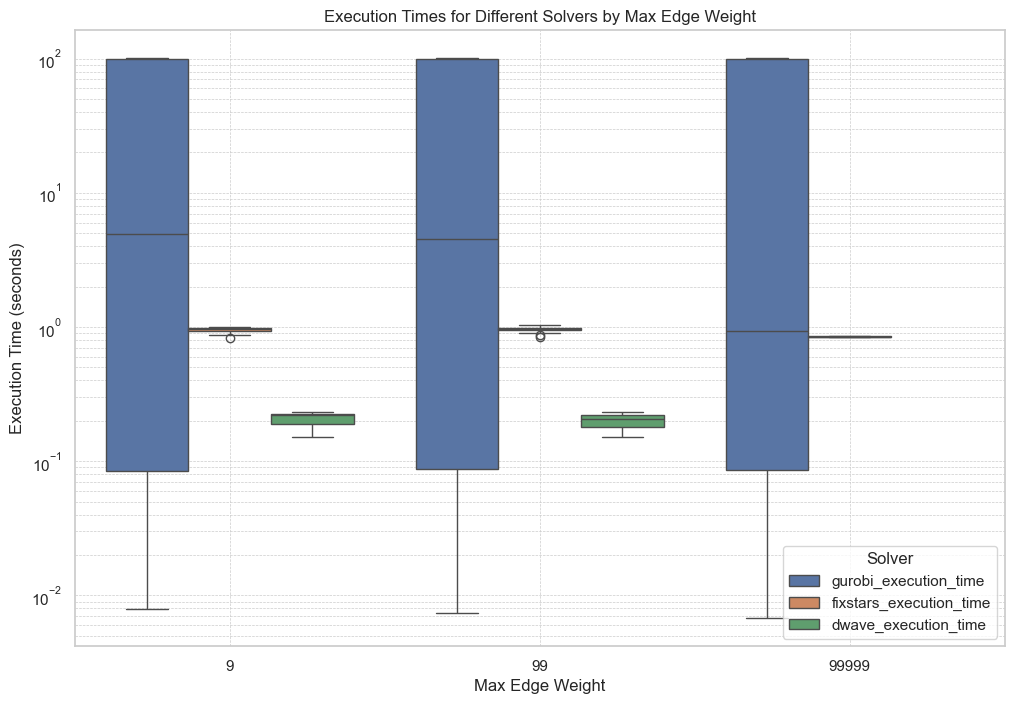

In [8]:
# Convert data to a pandas DataFrame for easy plotting
df = pd.DataFrame(data)

# Melt the DataFrame to have a long-form format suitable for Seaborn boxplot
df_melted = df.melt(id_vars=["max_edge_weight"], 
                    value_vars=["gurobi_execution_time", "fixstars_execution_time", "dwave_execution_time"], 
                    var_name="solver", 
                    value_name="execution_time")

# Plotting
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_melted, x="max_edge_weight", y="execution_time", hue="solver")
plt.yscale("log")

# Adding labels and title
plt.xlabel("Max Edge Weight")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Times for Different Solvers by Max Edge Weight")
plt.legend(title="Solver")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

## Summary

### Success Rate

- D-Wave stops working at $n = 8$
- When Edge Weight is high, fixstars and D-Wave failed (Likely due to bad constraint weight set)
- Gurobi always success

### Execution Time

- Gurobi starts to take longer than a second at $n = 8$ and reached 100 Seconds (Timeout set) at $n = 10$
- Fixstars always run until timeout (Set at 1 Second)
- D-Wave takes only few hundred millisecond

### Effect of $n$

- Takes longer time and impact the solution quality

### Effect of High Edge Weight

- Have no impact on Time
- May have impact on Solution

## Current Issues

- Some failed run because weight is not set properly
- Did not keep log of why the run failed (Reject to Run or Ran but infeasible)

## Future Work

- Increase Gurobi Timeout based on $n$
- Find a way to make Fixstars execution time not depend on timeout set
- Make Fixstars and D-Wave able to solve even with high edge weight